In [1]:
!pip install -r requirements.txt

In [7]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 1.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


Mean Absolute Error: 3.31%


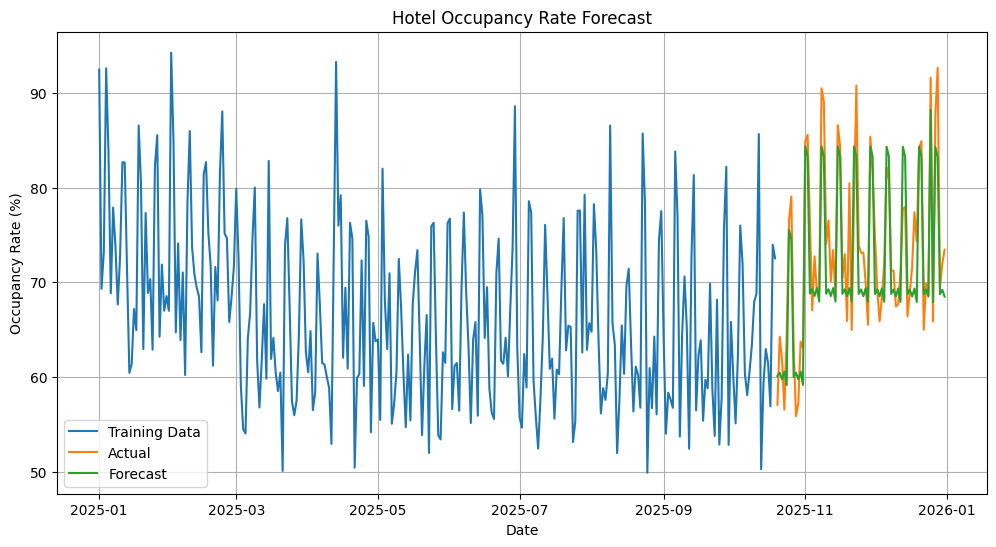

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# สร้างข้อมูลวันที่สำหรับการพยากรณ์
dates = pd.date_range(start='2025-01-01', end='2025-12-31')
df = pd.DataFrame({'date': dates})

# สร้าง features จากวันที่
df['dayofweek'] = df['date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['month'] = df['date'].dt.month
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# เพิ่มข้อมูลวันหยุดและเทศกาล (ตัวอย่าง)
holidays = ['2025-01-01', '2025-04-13', '2025-04-14', '2025-04-15', '2025-12-25']
df['is_holiday'] = df['date'].apply(lambda x: 1 if x.strftime('%Y-%m-%d') in holidays else 0)

# เพิ่มข้อมูลฤดูกาลท่องเที่ยว high/low season (ตัวอย่าง)
high_season_months = [1, 11, 12]  # มกราคม กุมภาพันธ์ พฤศจิกายน ธันวาคม
df['is_high_season'] = df['month'].apply(lambda x: 1 if x in high_season_months else 0)

# สร้างข้อมูลจำลองจากโรงแรมใกล้เคียงหรือภูมิภาคเดียวกัน
# (สมมติว่าเรามีข้อมูลนี้จากแหล่งอื่น)
np.random.seed(42)
base_occupancy = 60  # อัตราการเข้าพักเฉลี่ยพื้นฐาน
weekend_effect = 15  # ผลกระทบจากวันหยุดสุดสัปดาห์
holiday_effect = 20  # ผลกระทบจากวันหยุด
season_effect = 10   # ผลกระทบจากฤดูกาลท่องเที่ยว

# คำนวณอัตราการเข้าพักจากปัจจัยต่างๆ
df['occupancy_rate'] = (
    base_occupancy + 
    df['is_weekend'] * weekend_effect + 
    df['is_holiday'] * holiday_effect + 
    df['is_high_season'] * season_effect
)

# เพิ่มความผันผวนแบบสุ่ม
df['occupancy_rate'] += np.random.normal(0, 5, len(df))
df['occupancy_rate'] = df['occupancy_rate'].clip(0, 100)  # จำกัดค่าระหว่าง 0-100%

# แบ่งข้อมูลเป็นชุดสำหรับฝึกและทดสอบ
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# สร้างโมเดล SARIMAX โดยใช้ปัจจัยภายนอก
exog_factors = ['is_weekend', 'is_holiday', 'is_high_season']
model = SARIMAX(
    train_data['occupancy_rate'],
    exog=train_data[exog_factors],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 7)  # ใช้ความเป็นฤดูกาลแบบสัปดาห์
)

# ฝึกโมเดล
model_fit = model.fit(disp=False)

# พยากรณ์
forecast = model_fit.forecast(
    steps=len(test_data),
    exog=test_data[exog_factors]
)

# ประเมินประสิทธิภาพ
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_data['occupancy_rate'], forecast)
print(f'Mean Absolute Error: {mae:.2f}%')

# พล็อตผลลัพธ์
plt.figure(figsize=(12, 6))
plt.plot(train_data['date'], train_data['occupancy_rate'], label='Training Data')
plt.plot(test_data['date'], test_data['occupancy_rate'], label='Actual')
plt.plot(test_data['date'], forecast, label='Forecast')
plt.title('Hotel Occupancy Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'holiday_effect'] = max(df.loc[i, 'holiday_effect'],
/Users/theeratdolchat/Documents/finotel/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:169: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:169: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  plt

Mean Absolute Error: 9.94%
Root Mean Squared Error: 11.13%


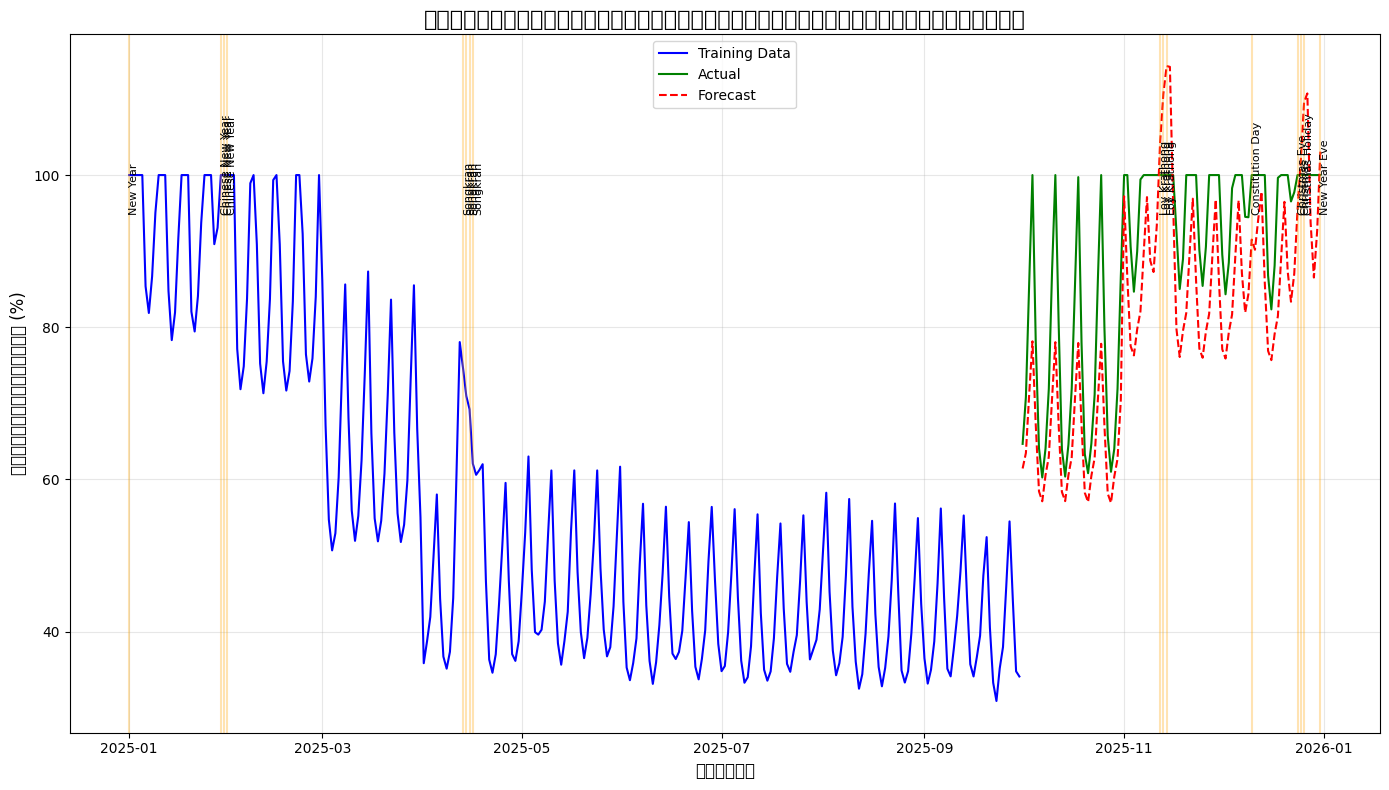

/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:183: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:183: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:183: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:183: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:183: UserWarning: Glyph 3637 (\N{THAI CHARACTER SARA II}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n

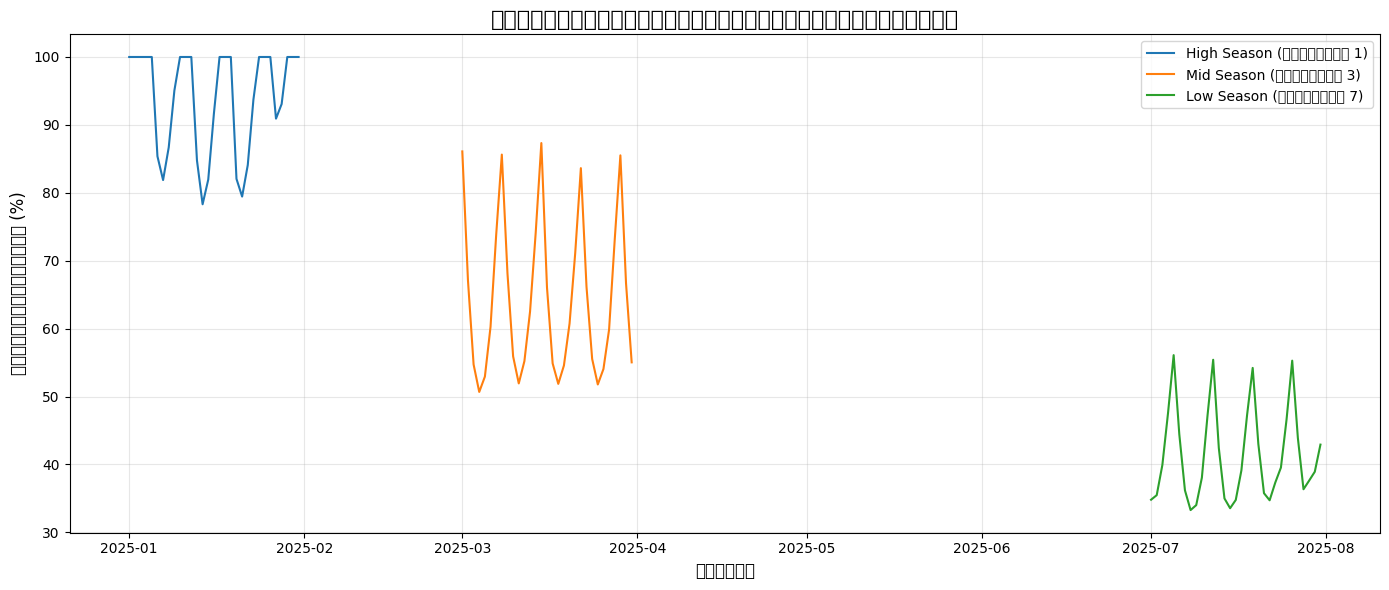

/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:197: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:197: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:197: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:197: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:197: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n

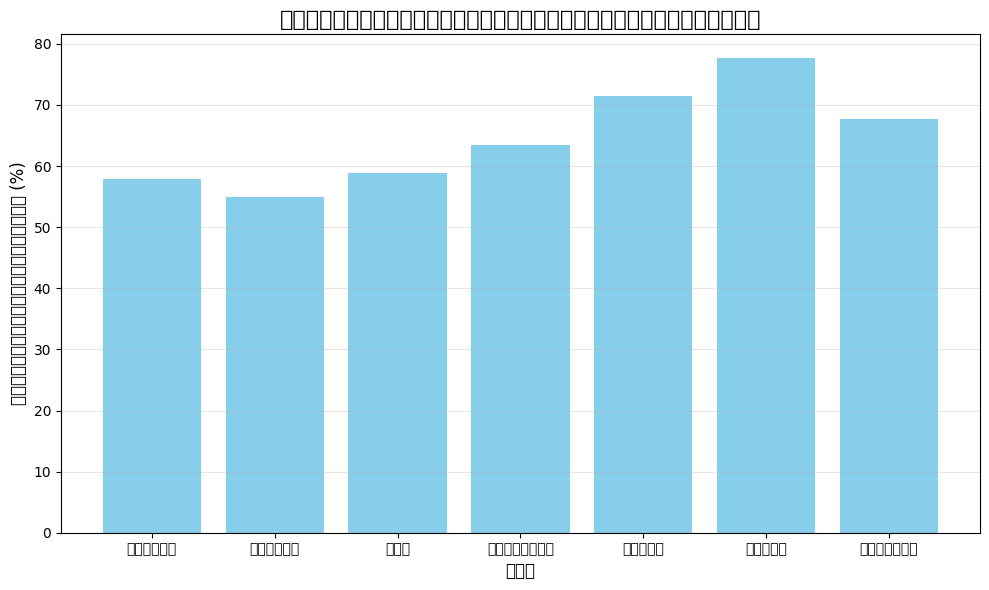

/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:227: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:227: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO KAI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:227: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:227: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/2256489494.py:227: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/_j/29xm46h90ng7h5ms1n444bmm00

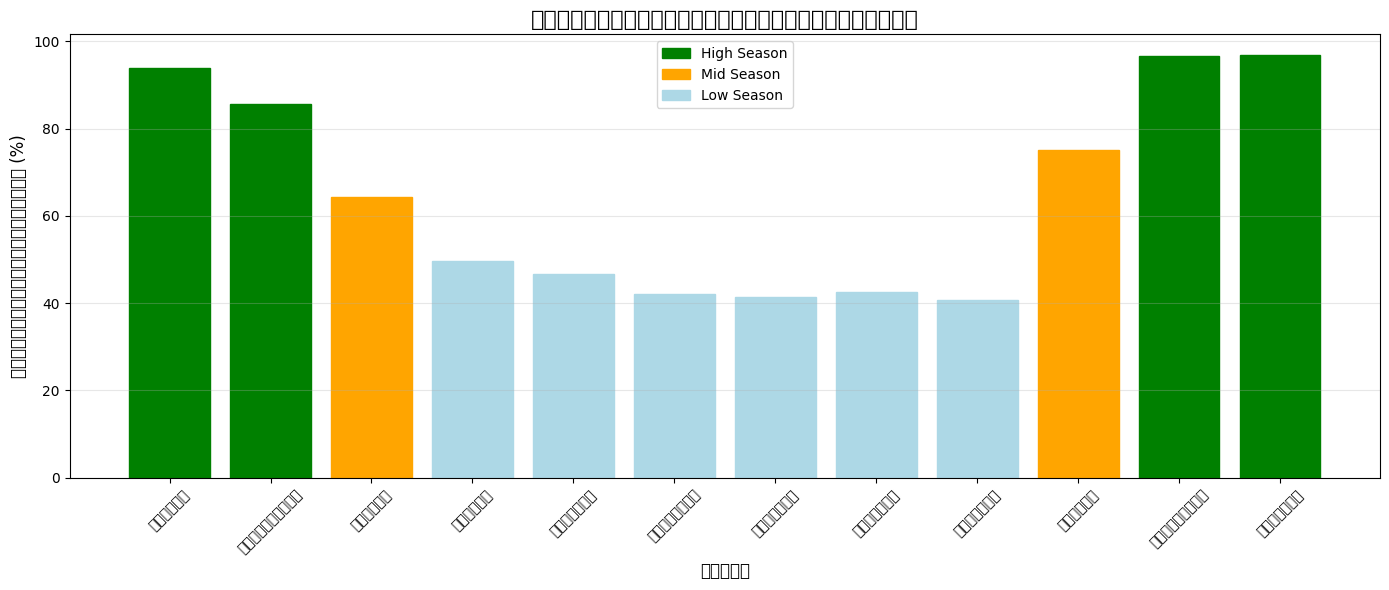

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# สร้างข้อมูลวันที่สำหรับการพยากรณ์
dates = pd.date_range(start='2025-01-01', end='2025-12-31')
df = pd.DataFrame({'date': dates})

# สร้าง features จากวันที่
df['dayofweek'] = df['date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['month'] = df['date'].dt.month
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# เพิ่มข้อมูลวันหยุดและเทศกาลที่สำคัญของเชียงใหม่
holidays = {
    # วันหยุดปีใหม่สากล
    '2025-01-01': {'name': 'New Year', 'effect': 25},
    # วันตรุษจีน (แปรผันตามปฏิทินจันทรคติ - สมมติเป็นวันที่ X ในปี 2025)
    '2025-01-29': {'name': 'Chinese New Year', 'effect': 20},
    '2025-01-30': {'name': 'Chinese New Year', 'effect': 20},
    '2025-01-31': {'name': 'Chinese New Year', 'effect': 20},
    # สงกรานต์
    '2025-04-13': {'name': 'Songkran', 'effect': 30},
    '2025-04-14': {'name': 'Songkran', 'effect': 35},
    '2025-04-15': {'name': 'Songkran', 'effect': 35},
    '2025-04-16': {'name': 'Songkran', 'effect': 25},
    # ลอยกระทง (ประมาณพฤศจิกายน - วันขึ้น 15 ค่ำ เดือน 12)
    '2025-11-12': {'name': 'Loy Krathong', 'effect': 30},
    '2025-11-13': {'name': 'Loy Krathong', 'effect': 35},
    '2025-11-14': {'name': 'Loy Krathong', 'effect': 30},
    # วันหยุดยาวปลายปี
    '2025-12-10': {'name': 'Constitution Day', 'effect': 15},
    '2025-12-24': {'name': 'Christmas Eve', 'effect': 20},
    '2025-12-25': {'name': 'Christmas', 'effect': 25},
    '2025-12-26': {'name': 'Christmas Holiday', 'effect': 25},
    '2025-12-31': {'name': 'New Year Eve', 'effect': 30},
}

# สร้าง feature วันหยุดและผลกระทบตามความสำคัญ
df['is_holiday'] = df['date'].apply(lambda x: 1 if x.strftime('%Y-%m-%d') in holidays else 0)
df['holiday_effect'] = df['date'].apply(lambda x: holidays.get(x.strftime('%Y-%m-%d'), {}).get('effect', 0))

# เพิ่มผลกระทบช่วงวันที่ใกล้เคียงกับวันหยุด
for i, row in df.iterrows():
    date_str = row['date'].strftime('%Y-%m-%d')
    if date_str not in holidays:
        # ตรวจสอบว่าอยู่ใกล้วันหยุดหรือไม่ (รัศมี 3 วัน)
        for j in range(1, 4):
            prev_date = (row['date'] - pd.Timedelta(days=j)).strftime('%Y-%m-%d')
            next_date = (row['date'] + pd.Timedelta(days=j)).strftime('%Y-%m-%d')
            
            # ถ้าวันก่อนหน้าเป็นวันหยุด
            if prev_date in holidays:
                df.loc[i, 'holiday_effect'] = max(df.loc[i, 'holiday_effect'], 
                                                holidays[prev_date]['effect'] * (1 - j*0.3))
            
            # ถ้าวันถัดไปเป็นวันหยุด
            if next_date in holidays:
                df.loc[i, 'holiday_effect'] = max(df.loc[i, 'holiday_effect'], 
                                                holidays[next_date]['effect'] * (1 - j*0.3))

# ฤดูกาลท่องเที่ยวของเชียงใหม่ (อ้างอิงจากข้อมูลการท่องเที่ยวจริง)
# High season: พฤศจิกายน-กุมภาพันธ์
# Mid season: ตุลาคม, มีนาคม
# Low season: เมษายน-กันยายน (ยกเว้นสงกรานต์)

high_season_months = [11, 12, 1, 2]  # พ.ย. ธ.ค. ม.ค. ก.พ.
mid_season_months = [3, 10]  # มี.ค. ต.ค.
# เมษายนเป็น low season แต่มีสงกรานต์เป็นช่วงพิเศษ

df['season_factor'] = df['month'].apply(lambda x: 
                                     1.8 if x in high_season_months else 
                                     1.3 if x in mid_season_months else 
                                     0.8)  # low season

# ปัจจัยสภาพอากาศ (เชียงใหม่มีปัญหาฝุ่น PM2.5 ในบางช่วง)
# ช่วงฝุ่น PM2.5 สูงในเชียงใหม่มักเป็นช่วงเดือนมกราคม-เมษายน
df['pm25_effect'] = df['month'].apply(lambda x: 
                                   -0.15 if x in [2, 3] else  # ผลกระทบมากในเดือน ก.พ.-มี.ค.
                                   -0.05 if x in [1, 4] else  # ผลกระทบปานกลางในเดือน ม.ค. และ เม.ย.
                                   0)  # ไม่มีผลกระทบในเดือนอื่น

# ฤดูฝนในเชียงใหม่ (มิถุนายน-กันยายน)
df['rainy_season'] = df['month'].apply(lambda x: -0.1 if x in [6, 7, 8, 9] else 0)

# ปัจจัยวันในสัปดาห์ (โรงแรมในเชียงใหม่คนมักจะพักช่วงวันหยุดสุดสัปดาห์)
weekday_factors = {
    0: 0.9,   # วันจันทร์
    1: 0.85,  # วันอังคาร (มักจะต่ำสุด)
    2: 0.9,   # วันพุธ
    3: 1.0,   # วันพฤหัสบดี (เริ่มขึ้น)
    4: 1.2,   # วันศุกร์ (เริ่มสูง)
    5: 1.4,   # วันเสาร์ (สูงสุด)
    6: 1.1    # วันอาทิตย์ (ยังสูงแต่เริ่มลดลง)
}
df['weekday_factor'] = df['dayofweek'].map(weekday_factors)

# กำหนดค่าพื้นฐานของอัตราการเข้าพักตามประเภทโรงแรม
# สมมติว่าเป็นโรงแรมระดับกลาง
base_occupancy = 55  # อัตราการเข้าพักเฉลี่ยพื้นฐาน

# คำนวณอัตราการเข้าพักจากปัจจัยต่างๆ 
df['base_occupancy'] = base_occupancy
df['occupancy_rate'] = (
    df['base_occupancy'] * df['season_factor'] * df['weekday_factor'] * (1 + df['pm25_effect'] + df['rainy_season']) + 
    df['holiday_effect']
)

# เพิ่มความผันผวนแบบสุ่มที่มีความสัมพันธ์กับวันที่ใกล้เคียง (autocorrelation)
# สร้าง random noise ที่มี autocorrelation
np.random.seed(42)
noise = np.random.normal(0, 3, len(df))
for i in range(1, len(noise)):
    noise[i] = 0.7 * noise[i-1] + 0.3 * noise[i]  # AR(1) process

df['occupancy_rate'] += noise
df['occupancy_rate'] = df['occupancy_rate'].clip(20, 100)  # จำกัดค่าระหว่าง 20-100%

# แบ่งข้อมูลเป็นชุดสำหรับฝึกและทดสอบ
train_data, test_data = train_test_split(df, test_size=0.25, shuffle=False)

# สร้างตัวแปรภายนอกสำหรับโมเดล
exog_factors = ['weekday_factor', 'holiday_effect', 'season_factor', 'pm25_effect', 'rainy_season']

# สร้างโมเดล SARIMAX โดยใช้ปัจจัยภายนอก
model = SARIMAX(
    train_data['occupancy_rate'],
    exog=train_data[exog_factors],
    order=(2, 1, 2),           # พิจารณาอันดับของ AR และ MA components เพิ่มขึ้น
    seasonal_order=(1, 1, 1, 7)  # ใช้ความเป็นฤดูกาลแบบสัปดาห์
)

# ฝึกโมเดล
model_fit = model.fit(disp=False)

# พยากรณ์
forecast = model_fit.forecast(
    steps=len(test_data),
    exog=test_data[exog_factors]
)

# ประเมินประสิทธิภาพ
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_data['occupancy_rate'], forecast)
rmse = np.sqrt(mean_squared_error(test_data['occupancy_rate'], forecast))
print(f'Mean Absolute Error: {mae:.2f}%')
print(f'Root Mean Squared Error: {rmse:.2f}%')

# พล็อตผลลัพธ์
plt.figure(figsize=(14, 8))
plt.plot(train_data['date'], train_data['occupancy_rate'], label='Training Data', color='blue')
plt.plot(test_data['date'], test_data['occupancy_rate'], label='Actual', color='green')
plt.plot(test_data['date'], forecast, label='Forecast', color='red', linestyle='--')

# เพิ่มการเน้นช่วงเทศกาลสำคัญ
for date_str, info in holidays.items():
    date = pd.to_datetime(date_str)
    if date in df['date'].values:
        plt.axvline(x=date, color='orange', alpha=0.3, linestyle='-')
        plt.text(date, 95, info['name'], rotation=90, fontsize=8)

plt.title('การพยากรณ์อัตราการเข้าพักของโรงแรมในเชียงใหม่', fontsize=16)
plt.xlabel('วันที่', fontsize=12)
plt.ylabel('อัตราการเข้าพัก (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# แสดงผลกราฟแยกตามฤดูกาล
plt.figure(figsize=(14, 6))
for month, season in [(1, 'High Season'), (3, 'Mid Season'), (7, 'Low Season')]:
    month_data = df[df['month'] == month]
    plt.plot(month_data['date'], month_data['occupancy_rate'], label=f'{season} (เดือนที่ {month})')

plt.title('เปรียบเทียบอัตราการเข้าพักตามฤดูกาล', fontsize=16)
plt.xlabel('วันที่', fontsize=12)
plt.ylabel('อัตราการเข้าพัก (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# แสดงความสัมพันธ์ของอัตราการเข้าพักตามวันในสัปดาห์
weekday_avg = df.groupby('dayofweek')['occupancy_rate'].mean().reset_index()
weekday_names = ['จันทร์', 'อังคาร', 'พุธ', 'พฤหัสบดี', 'ศุกร์', 'เสาร์', 'อาทิตย์']
weekday_avg['day_name'] = weekday_avg['dayofweek'].apply(lambda x: weekday_names[x])

plt.figure(figsize=(10, 6))
plt.bar(weekday_avg['day_name'], weekday_avg['occupancy_rate'], color='skyblue')
plt.title('อัตราการเข้าพักเฉลี่ยตามวันในสัปดาห์', fontsize=16)
plt.xlabel('วัน', fontsize=12)
plt.ylabel('อัตราการเข้าพักเฉลี่ย (%)', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# แสดงผลตามเดือน
monthly_avg = df.groupby('month')['occupancy_rate'].mean().reset_index()
month_names = ['มกราคม', 'กุมภาพันธ์', 'มีนาคม', 'เมษายน', 'พฤษภาคม', 'มิถุนายน', 
               'กรกฎาคม', 'สิงหาคม', 'กันยายน', 'ตุลาคม', 'พฤศจิกายน', 'ธันวาคม']
monthly_avg['month_name'] = monthly_avg['month'].apply(lambda x: month_names[x-1])

plt.figure(figsize=(14, 6))
bars = plt.bar(monthly_avg['month_name'], monthly_avg['occupancy_rate'])

# ระบายสีตามฤดูกาล
for i, bar in enumerate(bars):
    if i+1 in high_season_months:
        bar.set_color('green')
    elif i+1 in mid_season_months:
        bar.set_color('orange')
    else:
        bar.set_color('lightblue')

plt.title('อัตราการเข้าพักเฉลี่ยตามเดือน', fontsize=16)
plt.xlabel('เดือน', fontsize=12)
plt.ylabel('อัตราการเข้าพักเฉลี่ย (%)', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.xticks(rotation=45)
legend_elements = [plt.Rectangle((0,0),1,1, color='green', label='High Season'),
                  plt.Rectangle((0,0),1,1, color='orange', label='Mid Season'),
                  plt.Rectangle((0,0),1,1, color='lightblue', label='Low Season')]
plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()

/var/folders/_j/29xm46h90ng7h5ms1n444bmm0000gn/T/ipykernel_63144/3217779806.py:56: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'holiday_effect'] = max(df.loc[i, 'holiday_effect'],
/Users/theeratdolchat/Documents/finotel/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error: 9.94%
Root Mean Squared Error: 11.13%


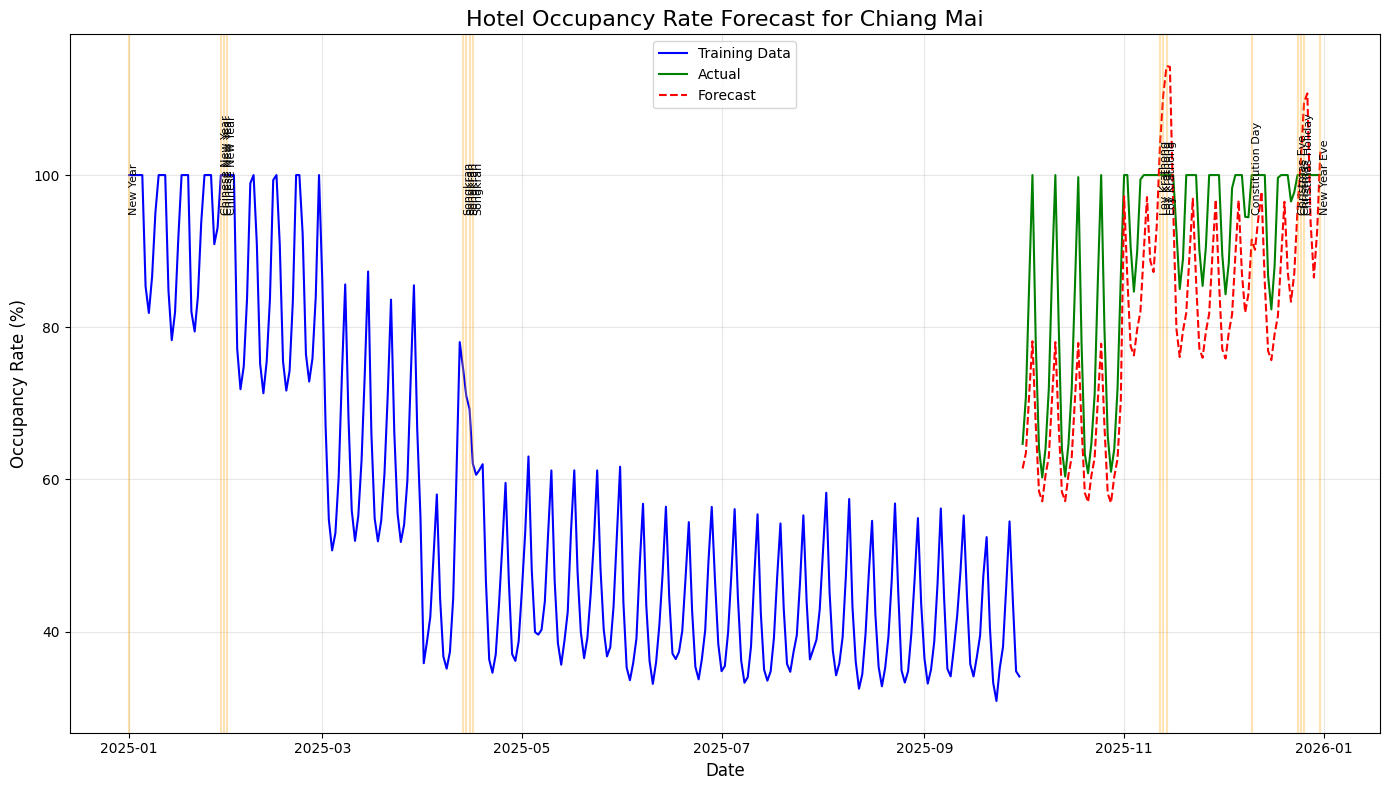

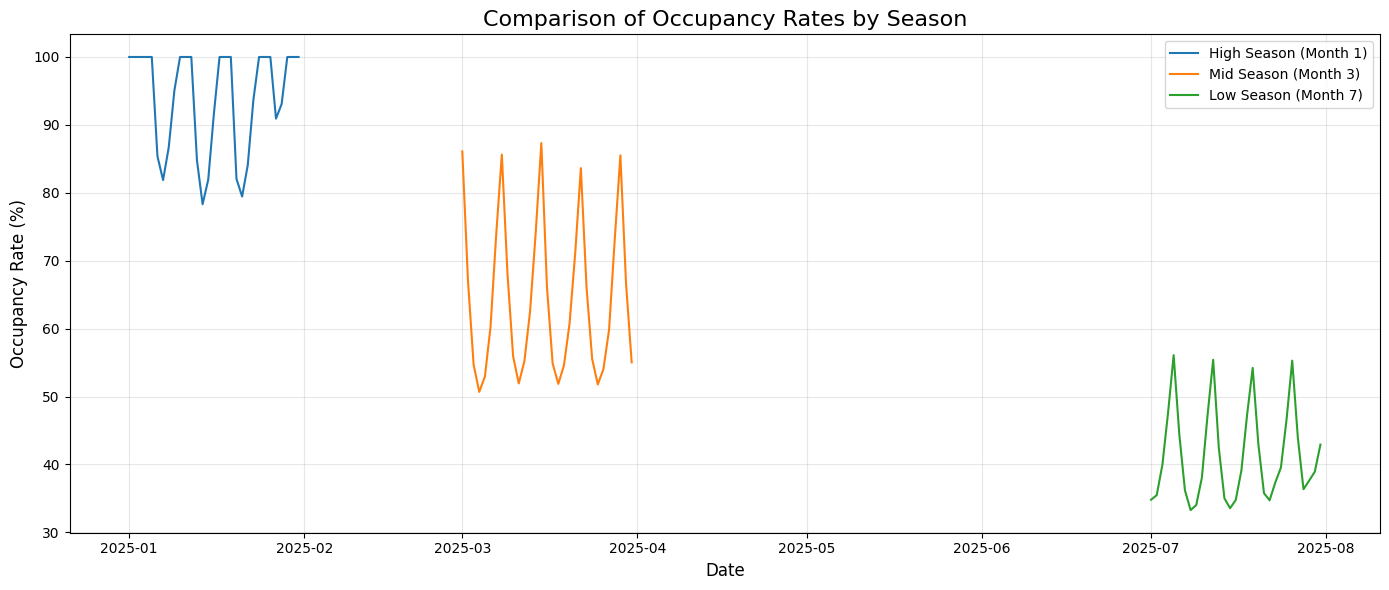

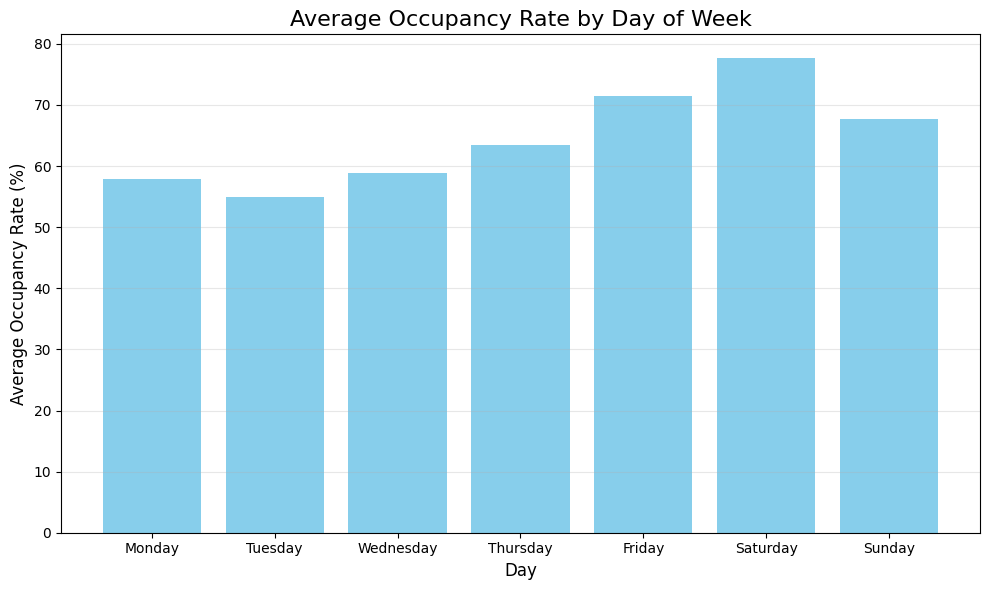

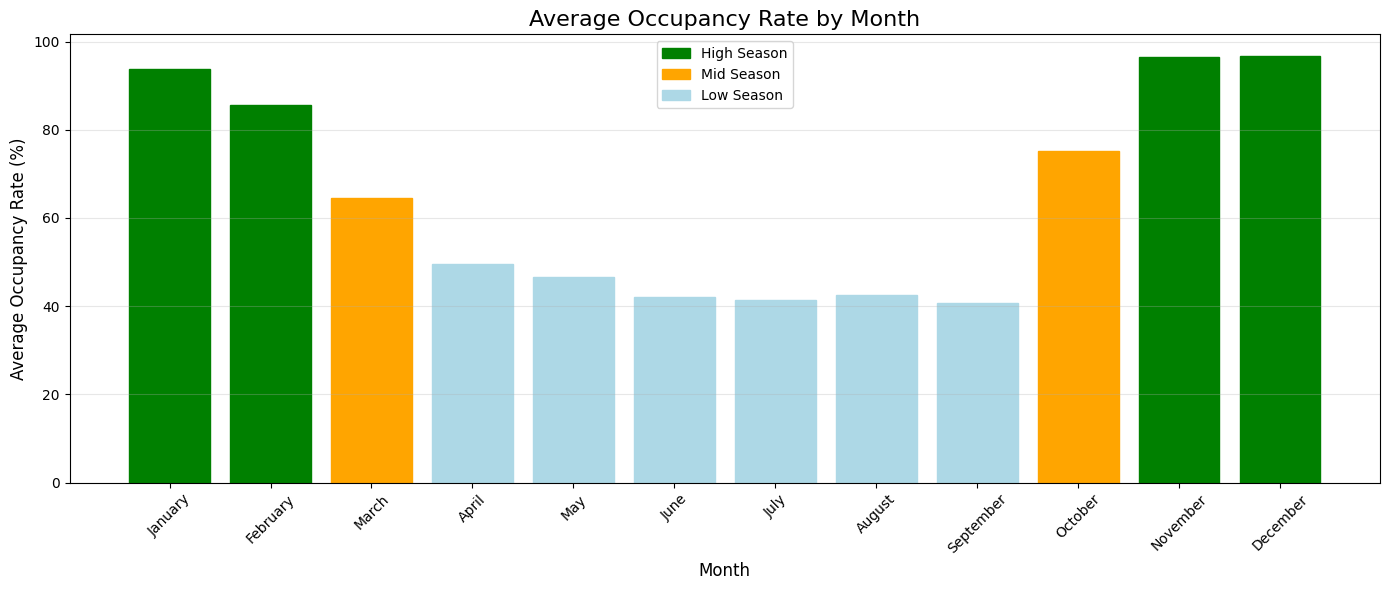

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# Create date data for forecasting
dates = pd.date_range(start='2025-01-01', end='2025-12-31')
df = pd.DataFrame({'date': dates})

# Create features from dates
df['dayofweek'] = df['date'].dt.dayofweek  # 0=Monday, 6=Sunday
df['month'] = df['date'].dt.month
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# Add important holidays and festivals in Chiang Mai
holidays = {
    # New Year
    '2025-01-01': {'name': 'New Year', 'effect': 25},
    # Chinese New Year (varies according to lunar calendar - assume X date in 2025)
    '2025-01-29': {'name': 'Chinese New Year', 'effect': 20},
    '2025-01-30': {'name': 'Chinese New Year', 'effect': 20},
    '2025-01-31': {'name': 'Chinese New Year', 'effect': 20},
    # Songkran
    '2025-04-13': {'name': 'Songkran', 'effect': 30},
    '2025-04-14': {'name': 'Songkran', 'effect': 35},
    '2025-04-15': {'name': 'Songkran', 'effect': 35},
    '2025-04-16': {'name': 'Songkran', 'effect': 25},
    # Loy Krathong (approximately November - 15th day of the 12th lunar month)
    '2025-11-12': {'name': 'Loy Krathong', 'effect': 30},
    '2025-11-13': {'name': 'Loy Krathong', 'effect': 35},
    '2025-11-14': {'name': 'Loy Krathong', 'effect': 30},
    # Year-end holidays
    '2025-12-10': {'name': 'Constitution Day', 'effect': 15},
    '2025-12-24': {'name': 'Christmas Eve', 'effect': 20},
    '2025-12-25': {'name': 'Christmas', 'effect': 25},
    '2025-12-26': {'name': 'Christmas Holiday', 'effect': 25},
    '2025-12-31': {'name': 'New Year Eve', 'effect': 30},
}

# Create holiday features and impact based on importance
df['is_holiday'] = df['date'].apply(lambda x: 1 if x.strftime('%Y-%m-%d') in holidays else 0)
df['holiday_effect'] = df['date'].apply(lambda x: holidays.get(x.strftime('%Y-%m-%d'), {}).get('effect', 0))

# Add effect for days near holidays
for i, row in df.iterrows():
    date_str = row['date'].strftime('%Y-%m-%d')
    if date_str not in holidays:
        # Check if it's near a holiday (within 3 days)
        for j in range(1, 4):
            prev_date = (row['date'] - pd.Timedelta(days=j)).strftime('%Y-%m-%d')
            next_date = (row['date'] + pd.Timedelta(days=j)).strftime('%Y-%m-%d')
            
            # If previous day is a holiday
            if prev_date in holidays:
                df.loc[i, 'holiday_effect'] = max(df.loc[i, 'holiday_effect'], 
                                                holidays[prev_date]['effect'] * (1 - j*0.3))
            
            # If next day is a holiday
            if next_date in holidays:
                df.loc[i, 'holiday_effect'] = max(df.loc[i, 'holiday_effect'], 
                                                holidays[next_date]['effect'] * (1 - j*0.3))

# Chiang Mai tourism seasons (based on actual tourism data)
# High season: November-February
# Mid season: October, March
# Low season: April-September (except Songkran)

high_season_months = [11, 12, 1, 2]  # Nov, Dec, Jan, Feb
mid_season_months = [3, 10]  # Mar, Oct
# April is low season but has Songkran as a special period

df['season_factor'] = df['month'].apply(lambda x: 
                                     1.8 if x in high_season_months else 
                                     1.3 if x in mid_season_months else 
                                     0.8)  # low season

# Weather factors (Chiang Mai has PM2.5 pollution issues in certain periods)
# High PM2.5 period in Chiang Mai is usually January-April
df['pm25_effect'] = df['month'].apply(lambda x: 
                                   -0.15 if x in [2, 3] else  # High impact in Feb-Mar
                                   -0.05 if x in [1, 4] else  # Moderate impact in Jan and Apr
                                   0)  # No impact in other months

# Rainy season in Chiang Mai (June-September)
df['rainy_season'] = df['month'].apply(lambda x: -0.1 if x in [6, 7, 8, 9] else 0)

# Day of week factors (hotels in Chiang Mai are often booked on weekends)
weekday_factors = {
    0: 0.9,   # Monday
    1: 0.85,  # Tuesday (usually lowest)
    2: 0.9,   # Wednesday
    3: 1.0,   # Thursday (starts increasing)
    4: 1.2,   # Friday (starts high)
    5: 1.4,   # Saturday (highest)
    6: 1.1    # Sunday (still high but starting to decrease)
}
df['weekday_factor'] = df['dayofweek'].map(weekday_factors)

# Set base occupancy rate by hotel type
# Assume it's a mid-range hotel
base_occupancy = 55  # Base average occupancy rate

# Calculate occupancy rate from various factors
df['base_occupancy'] = base_occupancy
df['occupancy_rate'] = (
    df['base_occupancy'] * df['season_factor'] * df['weekday_factor'] * (1 + df['pm25_effect'] + df['rainy_season']) + 
    df['holiday_effect']
)

# Add random fluctuations with autocorrelation
# Create random noise with autocorrelation
np.random.seed(42)
noise = np.random.normal(0, 3, len(df))
for i in range(1, len(noise)):
    noise[i] = 0.7 * noise[i-1] + 0.3 * noise[i]  # AR(1) process

df['occupancy_rate'] += noise
df['occupancy_rate'] = df['occupancy_rate'].clip(20, 100)  # Limit values between 20-100%

# Split data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.25, shuffle=False)

# Create exogenous variables for the model
exog_factors = ['weekday_factor', 'holiday_effect', 'season_factor', 'pm25_effect', 'rainy_season']

# Create SARIMAX model using exogenous factors
model = SARIMAX(
    train_data['occupancy_rate'],
    exog=train_data[exog_factors],
    order=(2, 1, 2),           # Consider higher orders of AR and MA components
    seasonal_order=(1, 1, 1, 7)  # Use weekly seasonality
)

# Train the model
model_fit = model.fit(disp=False)

# Forecast
forecast = model_fit.forecast(
    steps=len(test_data),
    exog=test_data[exog_factors]
)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_data['occupancy_rate'], forecast)
rmse = np.sqrt(mean_squared_error(test_data['occupancy_rate'], forecast))
print(f'Mean Absolute Error: {mae:.2f}%')
print(f'Root Mean Squared Error: {rmse:.2f}%')

# Plot results
plt.figure(figsize=(14, 8))
plt.plot(train_data['date'], train_data['occupancy_rate'], label='Training Data', color='blue')
plt.plot(test_data['date'], test_data['occupancy_rate'], label='Actual', color='green')
plt.plot(test_data['date'], forecast, label='Forecast', color='red', linestyle='--')

# Highlight important festivals
for date_str, info in holidays.items():
    date = pd.to_datetime(date_str)
    if date in df['date'].values:
        plt.axvline(x=date, color='orange', alpha=0.3, linestyle='-')
        plt.text(date, 95, info['name'], rotation=90, fontsize=8)

plt.title('Hotel Occupancy Rate Forecast for Chiang Mai', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Occupancy Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Show graph by season
plt.figure(figsize=(14, 6))
for month, season in [(1, 'High Season'), (3, 'Mid Season'), (7, 'Low Season')]:
    month_data = df[df['month'] == month]
    plt.plot(month_data['date'], month_data['occupancy_rate'], label=f'{season} (Month {month})')

plt.title('Comparison of Occupancy Rates by Season', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Occupancy Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Show relationship of occupancy rate by day of week
weekday_avg = df.groupby('dayofweek')['occupancy_rate'].mean().reset_index()
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg['day_name'] = weekday_avg['dayofweek'].apply(lambda x: weekday_names[x])

plt.figure(figsize=(10, 6))
plt.bar(weekday_avg['day_name'], weekday_avg['occupancy_rate'], color='skyblue')
plt.title('Average Occupancy Rate by Day of Week', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Average Occupancy Rate (%)', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Show results by month
monthly_avg = df.groupby('month')['occupancy_rate'].mean().reset_index()
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg['month_name'] = monthly_avg['month'].apply(lambda x: month_names[x-1])

plt.figure(figsize=(14, 6))
bars = plt.bar(monthly_avg['month_name'], monthly_avg['occupancy_rate'])

# Color by season
for i, bar in enumerate(bars):
    if i+1 in high_season_months:
        bar.set_color('green')
    elif i+1 in mid_season_months:
        bar.set_color('orange')
    else:
        bar.set_color('lightblue')

plt.title('Average Occupancy Rate by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Occupancy Rate (%)', fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.xticks(rotation=45)
legend_elements = [plt.Rectangle((0,0),1,1, color='green', label='High Season'),
                  plt.Rectangle((0,0),1,1, color='orange', label='Mid Season'),
                  plt.Rectangle((0,0),1,1, color='lightblue', label='Low Season')]
plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()